In [4]:
!pip install seaborn

     |████████████████████████████████| 296kB 8.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

In [9]:
#load data 
world_cup = pd.read_csv('World Cup 2019 Dataset.csv')
results = pd.read_csv('results.csv')

In [13]:
print (world_cup.shape)
print (results.shape)

(10, 7)
(996, 6)


In [11]:
world_cup.head()

,Team,Group,Previous \nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\nsemifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [12]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [150]:
#exploring results to discover insights

In [151]:
#checking for India
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
df.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [17]:
df.shape

(198, 6)

In [28]:
#India Win Percentage in past matches
print((len(df[df['Winner'] == 'India'])/df.shape[0]) *100.0)

61.61616161616161


In [177]:
def get_win_percentage(list, data):
    my_df = pd.DataFrame(columns=["Country", "Win_Percentage"])
    country_list = [] 
    win_Percent_list = []
    for i in list:
        df = data[(data['Team_1'] == i) | (data['Team_2'] == i)] 
        country_list.append(i)
        win_Percent_list.append(round(len(df[df['Winner'] == i])/(df.shape[0])*100.0,2))

    my_df['Country'] = country_list
    my_df['Win_Percentage'] = win_Percent_list
    return my_df.sort_values('Win_Percentage',ascending=False)    

In [178]:
list_of_participants = ['England', 'South Africa', 'West Indies', 'Pakistan', 'New Zealand', 
                        'Sri Lanka', 'Afghanistan', 'Australia', 'Bangladesh', 'India']

In [179]:
output = get_win_percentage(list_of_participants, results)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

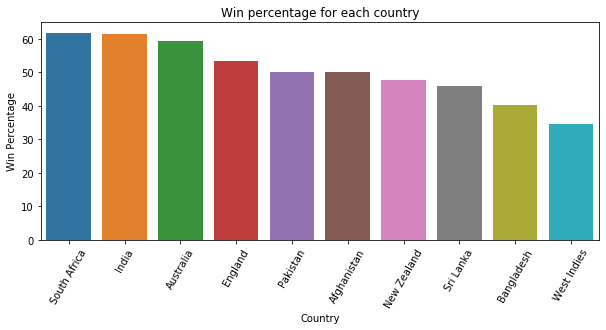

In [180]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Country', y = 'Win_Percentage', data = output).set_title('Win percentage for each country')
plt.xlabel("Country")
plt.ylabel("Win Percentage")
plt.xticks(rotation = 60)

In [158]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [169]:
#cleaning date column for exploration
results.loc[results.date == 'Jul 3-4, 2010', 'date'] = '03-07-2010'
results.loc[results.date == 'Aug 19-20, 2010', 'date'] = '19-08-2010'
results.loc[results.date == 'Jul 11-12, 2012', 'date'] = '11-07-2013'
results.loc[results.date == 'Jul 2-3, 2013', 'date'] = '02-07-2013'
results.loc[results.date == 'Jul 7-8, 2013', 'date'] = '03-07-2013'
results.loc[results.date == 'Aug 27-28, 2013', 'date'] = '27-08-2013'
results.loc[results.date == 'Dec 10-11, 2014', 'date'] = '10-12-2014'

In [170]:
#creating a column for matches played in 2010
year = []
for row in results['date']:
    year.append(int(row[7:]))
results['match_year']= year
results_2010 = results[results.match_year >= 10]
#print((len(df_2010[df_2010['Winner'] == 'India'])/df_2010.shape[0]) *100.0)

In [168]:
results_2010.head()

,date,Team_1,Team_2,Winner,Margin,Ground,match_year
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka,10
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka,10
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka,10
7,22-Jan-10,Australia,Pakistan,Australia,5 wickets,Brisbane,10
8,24-Jan-10,Australia,Pakistan,Australia,140 runs,Sydney,10


In [176]:
results_2010['Winner'].unique()

array(['India', 'Sri Lanka', 'Australia', 'New Zealand', 'no result',
       'Kenya', 'Afghanistan', 'Netherlands', 'Canada', 'South Africa',
       'England', 'West Indies', 'Zimbabwe', 'Pakistan', 'Ireland',
       'Bangladesh', 'Scotland', 'tied', 'U.A.E.', 'Hong Kong'],
      dtype=object)

In [181]:
output_2010 = get_win_percentage(list_of_participants, results_2010)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

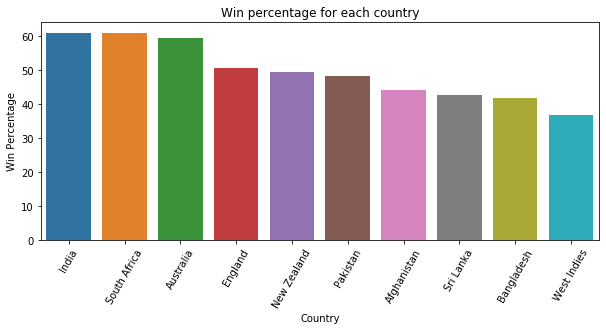

In [182]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'Country', y = 'Win_Percentage', data = output_2010).set_title('Win percentage for each country')
plt.xlabel("Country")
plt.ylabel("Win Percentage")
plt.xticks(rotation = 60)